# Question 1: The Game of Nodes

This is the generated map of Westeros. I tried ridicuously hard to try to get the nodes spaced out so one could see evey city name and weight between each city, but I couldn't reconcile the juxtaposition of every city having a set coordinate vector and trying to increase their distance from each other. Neither adding distance nor scaling every coordinate up did anything to change the generated visualization

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


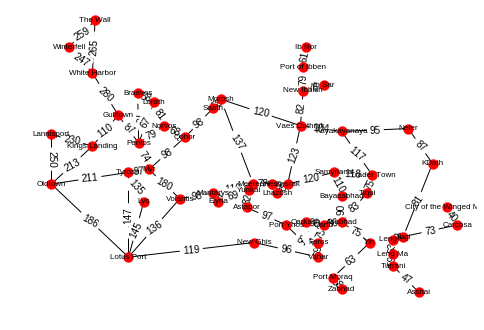

In [0]:
#code cell for map
#map itself:https://i.redd.it/ap8fmgf1fzcz.jpg
import networkx as nx

G = nx.Graph()
with open("data.csv", "r") as csv:
  for line in csv:
    lineN = line.split(",")
    if lineN[1].isnumeric():
      x = int(lineN[1])
      y = int(lineN[2])
      G.add_node(lineN[0], pos=(x,y))
    else:
      G.add_edge(lineN[0], lineN[1], weight = int(lineN[2]))
edge_labels=dict([((u,v),d['weight'])
                 for u,v,d in G.edges(data=True)])
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
nx.draw(G, pos=pos, with_labels=True, font_size=8, node_size=100)



The White Walkers start at The Wall and reach every city on the map with as least cost as possible. This code block prints the sequence of cities that the Walkers visit

In [0]:
import networkx as nx


G = nx.Graph()
with open("data.csv", "r") as csv:
  for line in csv:
    lineN = line.split(",")
    if lineN[1].isnumeric():
      x = int(lineN[1])
      y = int(lineN[2])
      G.add_node(lineN[0], pos=(x,y))
    else:
      G.add_edge(lineN[0], lineN[1], weight = int(lineN[2]))
root = 'The Wall'
centrality = nx.eigenvector_centrality(G)
edges = nx.bfs_beam_edges(G, source=root, value=centrality.get, width=5)
path = [root] + [v for u,v in edges]
print(path)

['The Wall', 'White Harbor', 'Winterfell', 'Gulltown', 'Pentos', 'Kings Landing', 'Myr', 'Norvos', 'Lorath', 'Braavos', 'Oldtown', 'Lannisport', 'Tyrosh', 'Volantis', 'Qohor', 'Lotus Port', 'Lys', 'Mantarys', 'Saath', 'New Ghis', 'Meereen', 'Elyria', 'Morosh', 'Vahar', 'Yunkai', 'Hesh', 'Vaes Dothrak', 'Port Yhos', 'Faros', 'Qarkash', 'Astapor', 'Lhazosh', 'Kosrak', 'Kayakayanaya', 'New Ibbish', 'Qarth', 'Samyriana', 'Trader Town', 'Nefer', 'Port of Ibben', 'Ib Sar', 'Asabhad', 'Bayasabhad', 'Tiqui', 'KDath', 'Ib Nor', 'Yin', 'Jinqi', 'Port Moraq', 'Leng Yi', 'Carcosa', 'Zabhad', 'Leng Ma', 'City of the Winged Men', 'Turrani', 'Asshai']


Jon Snow starts at Turrani and needs to get to The Wall. This code block prints the order of cities he will visit in order to reach The Wall with as least cost as possible.

['Turrani', 'Leng Ma', 'Leng Yi', 'Jinqi', 'KDath', 'Nefer', 'Kayakayanaya', 'Vaes Dothrak', 'Morosh', 'Saath', 'Qohor', 'Norvos', 'Pentos', 'Gulltown', 'White Harbor', 'The Wall']



/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


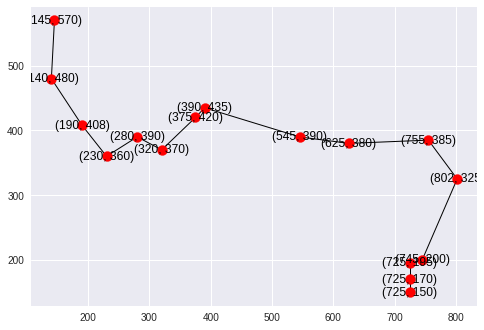

In [0]:
import networkx as nx

G = nx.Graph()
with open("data.csv", "r") as csv:
  for line in csv:
    lineN = line.split(",")
    if lineN[1].isnumeric():
      x = int(lineN[1])
      y = int(lineN[2])
      G.add_node(lineN[0], pos=(x,y))
    else:
      G.add_edge(lineN[0], lineN[1], weight = int(lineN[2]))

path = nx.shortest_path(G, source='Turrani', target='The Wall', weight='weight')
print(path, end="\n\n")

intersection = [key for key in G.nodes() if key in path]
nodesToRemove = []
nodes = G.nodes()
for element in nodes:
  if element not in intersection:
    nodesToRemove.append(element)
for element in nodesToRemove:
  G.remove_node(element)
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx_edges(G, pos=pos, edgelist=[x for x in G.edges(nbunch = path)])
nx.draw_networkx_labels(G, pos=pos, labels=pos)
nx.draw_networkx_nodes(G, pos=pos, node_size=100, nodelist=path, label=pos2)



# Question 2: Analysis

b = the maximum branching factor of a tree
d = the depth of the least-cost solution
m = the maximum depth of the state space
C* = the cost of the optimal solution
l = the depth limit of the tree

1) Which search algorithm is optimal for the White Walker search implemented
in question I? Identify which algorithm you implemented. Is it informed or uninformed?
If there is a heuristic, which heuristic function did you choose? Explain your choice of
this search algorithm.

        Any type of Breadth-first-search is the optimal search algorithm for whole-graph traversal. I implemented Beam Search, which is informed and uses BFS. I struggled on deciding a heuristic, but went with the centrality factor. I initally chose DFS because it was easier but networkx had functionality for Beam Search so I wanted to be more efficient and optimal. 
        
        
2) What is the time complexity White Walker search implemented in question I?
Show your work and express the answer in Big O notation.

          I used Beam Search / BFS, which has a limited time complexity since b is reduced to a constant (in my case, 5.) However, BFS usually has a time constant of O(b^(d+1)), but because b is limited to 5, O(b^(d+1)) >= O(5^(d+1))

3) Which searching algorithm is optimal for the Jon Snow search implemented in
question I? Identify which algorithm you implemented. Is it informed or uninformed? If
there is a heuristic, which heuristic function did you choose? Explain your choice of this
search algorithm.

        A* would be an optimal algorithm for the Jon Snow search due to its accuracy and speed. I implemented dijksta's algorithm, which is also optimal, but uninformed. I did not use a heuristic. I used this algorithm because it was easier to implement; I attemped to use A* but failed to find a proper heuristic.

4) What is the time complexity Jon Snow search implemented in question I?
Show your work and express the answer in Big O notation.

     I used dijkstra's algorithm, another name for uniform cost search, which has a time complexity of O(b^(ceil(C*/e))), because it is similar to DFS, but changes paths using minimum costs.


# Question 3: Bonus Question

Jon Snow and the walkers will never meet, assuming they go at the same speed. They are closest to meeting at the same city of Qohor, since Snow visits it at step 10 and the walkers at step 14. The closest distance they get is Snow at Pentos and the walkers at tyrosh, shown below in the printout. When they are close to meeting, notice how Jon Snow is much higher on the y axis than the walkers.

In [0]:
import networkx as nx

G = nx.Graph()
with open("data.csv", "r") as csv:
  for line in csv:
    lineN = line.split(",")
    if lineN[1].isnumeric():
      x = int(lineN[1])
      y = int(lineN[2])
      G.add_node(lineN[0], pos=(x,y))
    else:
      G.add_edge(lineN[0], lineN[1], weight = int(lineN[2]))

path = nx.shortest_path(G, source='Turrani', target='The Wall', weight='weight')

root = 'The Wall'
centrality = nx.eigenvector_centrality(G)
edges = nx.bfs_beam_edges(G, source=root, value=centrality.get, width=5)
path2 = [root] + [v for u,v in edges]
pos = nx.get_node_attributes(G, 'pos')
shortest_path = 999
for i in range(len(path)):
  jx,jy = pos[path[i]]
  wx,wy = pos[path2[i]]
  print("JonSnow step %d is %s, position is %d,%d" % (i, path[i], jx,jy))
  print("Walkers step %d is %s, position is %d,%d\n" % (i, path2[i], wx,wy))
  if path[i] == path2[i+4]:
    print(path[i])
  path3 = dict(nx.all_pairs_shortest_path_length(G))
  if (path3[path[i]][path2[i]]) < shortest_path:
    shortJ = path[i]
    shortW= path2[i]
    shortest_path = path3[path[i]][path2[i]]
    index = i
print("shortest path is %d, between JonSnow:%s and Walkers:%s (step %d)" % 
      (shortest_path, shortJ, shortW, index))



JonSnow step 0 is Turrani, position is 725,150
Walkers step 0 is The Wall, position is 145,570

JonSnow step 1 is Leng Ma, position is 725,170
Walkers step 1 is White Harbor, position is 140,480

JonSnow step 2 is Leng Yi, position is 725,195
Walkers step 2 is Winterfell, position is 95,525

JonSnow step 3 is Jinqi, position is 745,200
Walkers step 3 is Gulltown, position is 190,408

JonSnow step 4 is KDath, position is 802,325
Walkers step 4 is Pentos, position is 230,360

JonSnow step 5 is Nefer, position is 755,385
Walkers step 5 is Kings Landing, position is 140,355

JonSnow step 6 is Kayakayanaya, position is 625,380
Walkers step 6 is Myr, position is 250,315

JonSnow step 7 is Vaes Dothrak, position is 545,390
Walkers step 7 is Norvos, position is 280,390

JonSnow step 8 is Morosh, position is 390,435
Walkers step 8 is Lorath, position is 260,430

JonSnow step 9 is Saath, position is 375,420
Walkers step 9 is Braavos, position is 228,445

JonSnow step 10 is Qohor, position is 320